# What is Gradient desent ?
It is a first-order iterative algorithm used to find a local minimum of a differentiable multivariate function.

The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function

<img src="../images/Learning Rate.png" alt="Drawing" style="width: 500px;" title="Mean Squared Error"/>


### __Importing library__

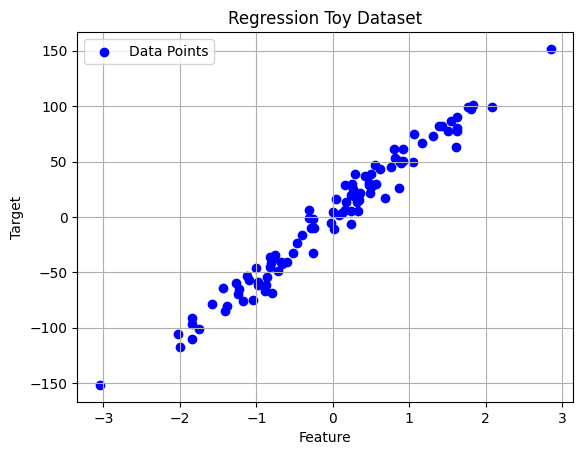

In [22]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np


X, y = make_regression(n_samples=100, n_features=1,n_informative=1,n_targets=1 ,noise=10)

plt.scatter(X, y, color='blue', label='Data Points')
plt.title('Regression Toy Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

### __SKLEARN LR COEFICIENT__

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X.reshape(-1,1),y.reshape(-1,1))

print(lr.coef_)
print(lr.intercept_)

[[54.31085133]]
[0.34318659]


## HOW EACH TYPE CONVERGES

<img src="../images/compare.png" alt="Drawing" style="width: 500px;" title="Mean Squared Error"/>

### __BATCH GD FROM SCRATCH__

__Definition__: This method calculates the gradient of the cost function with respect to the entire dataset. It updates the model parameters after processing all training examples.

__Pros__: It provides a stable and accurate convergence.

__Cons__: It can be very slow and computationally expensive for large datasets.



In [24]:
class GDRegressor:

  def __init__(self,learningRate=0.01,epochs=100):
    self.m = 0
    self.b = 0
    self.lr =learningRate
    self.epochs = epochs

  def fit(self,X,y):
    for i in range(self.epochs):
        loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
        loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

        self.b = self.b - (self.lr * loss_slope_b)
        self.m = self.m - (self.lr * loss_slope_m)
    return self.m,self.b

  def predict(self,y):
    return self.m*y + self.b


gd = GDRegressor(0.001,50)
gd.fit(X,y)

(54.31077127491882, 0.3431831955442613)

### __STOCHASTIC GD__
__Definition__: This method updates the model parameters for each training example, one at a time. It calculates the gradient and updates the parameters immediately after each example.

__Pros__: It is faster and can handle large datasets efficiently.

__Cons__: It can be noisy and may not converge as smoothly as batch gradient descent.




In [25]:
class SGDRegressor:

  def __init__(self,learningRate=0.01,epochs=100):
    self.m = 0
    self.b = 0
    self.lr =learningRate
    self.epochs = epochs

  def fit(self,X,y):
    for _ in range(self.epochs):

      for _ in range(X.shape[0]):
          i = np.random.randint(0,X.shape[0])
          loss_slope_b = -2 * (y[i] - self.m*X[i] - self.b)
          loss_slope_m = -2 * np.sum((y[i] - self.m*X[i] - self.b)*X[i])

          self.b = self.b - (self.lr * loss_slope_b)
          self.m = self.m - (self.lr * loss_slope_m)
    return self.m,self.b

  
  def predict(self,y):
    return self.m* y + self.b
  

sgd = SGDRegressor(0.001,500)
sgd.fit(X,y)


(54.051397998921836, array([0.02453657]))

### __Mini Batch 2d__
__Definition__: This method is a compromise between batch and stochastic gradient descent. It divides the dataset into small batches and updates the model parameters for each batch.

__Pros__: It balances the efficiency of SGD and the stability of batch gradient descent.

__Cons__: It still requires careful tuning of the batch size and learning rate.

In [26]:
class MGDRegressor:

  def __init__(self,learningRate=0.01,epochs=100,batch=10):
    self.m = 0
    self.b = 0
    self.lr =learningRate
    self.epochs = epochs
    self.batch = batch

  def fit(self,X,y):
    for j in range(int(X.shape[0]/self.batch)):
      idx = np.random.randint(0,X.shape[0],self.batch)

      for i in range(self.epochs):
          loss_slope_b = -2 * np.sum(y[idx] - self.m*X[idx] - self.b)
          loss_slope_m = -2 * np.sum((y[idx] - self.m*X[idx] - self.b)*X[idx])

          self.b = self.b - (self.lr * loss_slope_b)
          self.m = self.m - (self.lr * loss_slope_m)
      return self.m,self.b

  def predict(self,y):
    return self.m*y + self.b


mgd = MGDRegressor(0.001,100,10)
mgd.fit(X,y)


(9.839303102312242e-07, 9.450611235812426)

### __Plot graph__

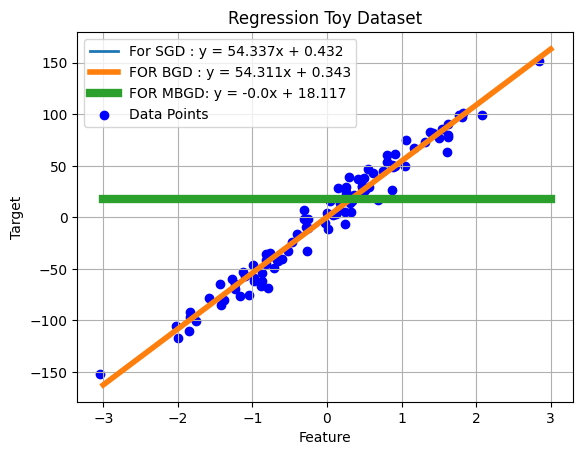

In [32]:
slope1,intercept1 = sgd.fit(X,y)
slope2,intercept2 = gd.fit(X,y)
slope3,intercept3 = mgd.fit(X,y)

x_vals = np.linspace(-3, 3, 200)  

y_1 = intercept1 + slope1 * x_vals
y_2 = intercept2 + slope2* x_vals
y_3 = intercept3 + slope3* x_vals

# Plot the line
plt.plot(x_vals, y_1, label=f'For SGD : y = {np.round(slope1,3)}x + {np.round(intercept1[0],3)} ',alpha=1,linewidth=2)
plt.plot(x_vals, y_2, label=f'FOR BGD : y = {np.round(slope2,3)}x + {np.round(intercept2,3)}',alpha=1,linewidth=4)
plt.plot(x_vals, y_3, label=f'FOR MBGD: y = {np.round(slope3,3)}x + {np.round(intercept3,3)}',alpha=1, linewidth=6)
plt.scatter(X, y, color='blue', label='Data Points')
plt.title('Regression Toy Dataset')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()